# Julia Set

These notes are taken from [IBM DeveloperWorks Blog]( https://www.ibm.com/developerworks/community/blogs/jfp/entry/Fast_Computation_of_Julia_Set_in_Python?lang=en).  Later I found this [iPython notebook](https://gist.github.com/jfpuget/7849c931dd7b8ef6f952).

There is also the mathematial blog of Carlos Matheus who discussees [Julia Set](https://matheuscmss.wordpress.com/2016/08/03/yoccoz-proof-of-jakobson-theorem-ii/) from mathematical point of view. We would like to learn about the Yoccoz Puzzle:

* **Complex Dynamics and Renormalization** http://www.math.harvard.edu/~ctm/papers/home/text/papers/real/book.pdf
* **Dynamics of Quadratic Polynomials** http://www.math.stonybrook.edu/~mlyubich/papers/acta.pdf

I rather like the idea that an entire branch of mathematics stems from the quadratic formula.  $ax^2 + bx + c = 0$ so that $x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$

* **Dynamics in One Complex Variable** http://www.math.harvard.edu/archive/118r_spring_05/docs/milnor.pdf
* Milnor's notes are somewhat deceptive since I read them and feel like I understand uniformization and complex dynamcs
* **Complex Dynamics Families and Friends** https://www.amazon.com/Complex-Dynamics-Families-Dierk-Schleicher/dp/156881450X

![Imgur](http://i.imgur.com/FHZTehm.png)

In [8]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [9]:
%%cython


import numpy as np
cimport numpy as np
import cython

@cython.boundscheck(False)
def julia_cython(int N):
    cdef np.ndarray[np.uint8_t, ndim=2] T = np.empty((N, 2*N), dtype=np.uint8)
    cdef double complex c = -0.835 - 0.2321j
    cdef double complex z
    cdef int J, I
    cdef double h = 2.0/N
    cdef double x, y
    for J in range(N):
        for I in range(2*N):
            y = -1.0 + J*h
            x = -2.0 + I*h
            T[J,I] = 0
            z = x + 1j * y
            while z.imag**2 + z.real**2 <= 4:
                z = z**2 + c
                T[J,I] += 1

    return T

In [10]:
J = julia_cython(10000)
J

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
type(J), J.shape

(numpy.ndarray, (10000, 20000))

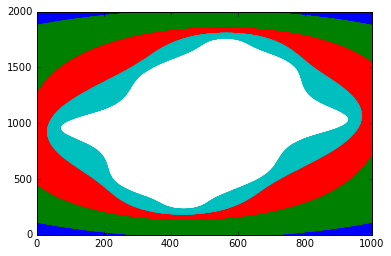

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

x,y = np.where(J[::10, ::10] == 0)
plt.plot(x,y, '.')

x,y = np.where(J[::10, ::10] == 1)
plt.plot(x,y, '.')

x,y = np.where(J[::10, ::10] == 2)
plt.plot(x,y, '.')

x,y = np.where(J[::10, ::10] == 3)
plt.plot(x,y, '.')


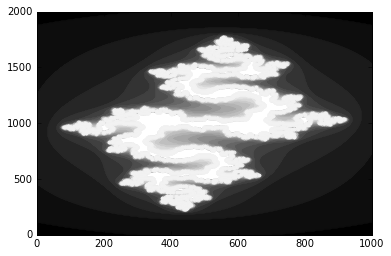

In [24]:
N = 20

for t in np.arange(N):
    x,y = np.where(J[::10, ::10] == t)
    plt.plot(x,y, '.', color= (t*1.0/N,t*1.0/N,t*1.0/N))

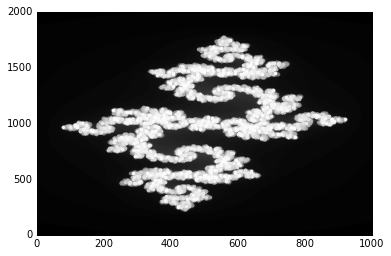

In [25]:
N = 100

for t in np.arange(N):
    x,y = np.where(J[::10, ::10] == t)
    plt.plot(x,y, '.', color= (t*1.0/N,t*1.0/N,t*1.0/N))

In [26]:
np.max(J)

254

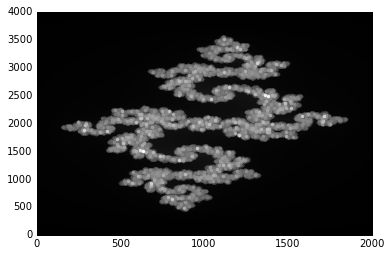

In [27]:
N = 250

for t in np.arange(N):
    x,y = np.where(J[::5, ::5] == t)
    plt.plot(x,y, '.', color= (t*1.0/N,t*1.0/N,t*1.0/N))

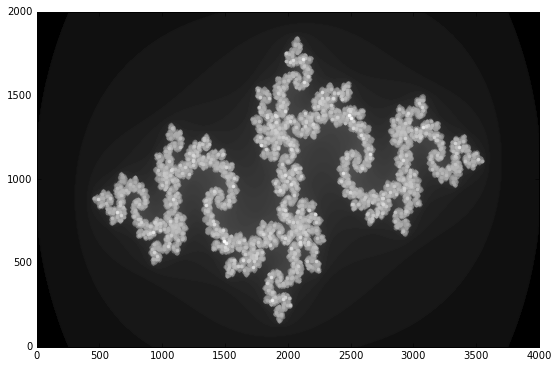

In [31]:
plt.rcParams['figure.figsize'] = 9,6

N = 250

for t in np.arange(N):
    y,x = np.where(J[::5, ::5] == t)
    s = np.sqrt(t*1.0/N)
    plt.plot(x,y, '.', color= (s,s,s))

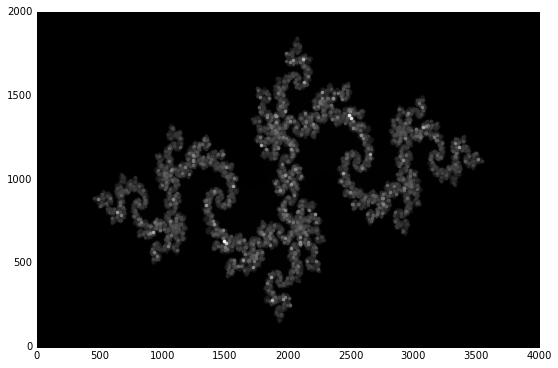

In [32]:
plt.rcParams['figure.figsize'] = 9,6

N = 250

for t in np.arange(N):
    y,x = np.where(J[::5, ::5] == t)
    s = (t*1.0/N)**2
    plt.plot(x,y, '.', color= (s,s,s))

# Improved Algorithm

This is also from the same IBM [blog](https://www.ibm.com/developerworks/community/blogs/jfp/entry/Fast_Computation_of_Julia_Set_in_Python?lang=en) -- runs faster because of careful use of C.

In [1]:
%load_ext Cython

In [2]:
%%cython

import numpy as np
cimport numpy as np
import cython

@cython.boundscheck(False)
@cython.wraparound(False)
cpdef julia_cython_opt(int N):
    cdef np.uint8_t[:,:] T = np.empty((N, 2*N), dtype=np.uint8)
    cdef double creal = -0.835, cimag = - 0.2321
    cdef double zreal, zimag, zreal2, zimag2
    cdef int J, I
    cdef double h = 2.0/N
    for J in range(N):
        for I in range(2*N):
            zimag = -1.0 + J*h
            zreal = -2.0 + I*h
            T[J,I] = 0
            zreal2 = zreal*zreal
            zimag2 = zimag*zimag
            while zimag2 + zreal2 <= 4:
                zimag = 2* zreal*zimag + cimag
                zreal = zreal2 - zimag2 + creal
                zreal2 = zreal*zreal
                zimag2 = zimag*zimag 
                T[J,I] += 1
                 
    return T

In [39]:
J = julia_cython_opt(10000)

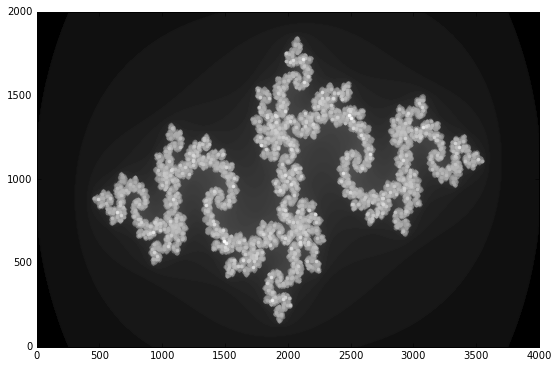

In [40]:
plt.rcParams['figure.figsize'] = 9,6

N = 250

for t in np.arange(N):
    y,x = np.where(J[::5, ::5] == t)
    s = np.sqrt(t*1.0/N)
    plt.plot(x,y, '.', color= (s,s,s))

# More Accurate Plotting

Looks like a divide-and-conquer approach; should understand the line `dpi=72` has to do with pixel resolution.  Not so smudgy!

In [37]:
def julia_image(N,cmap='gnuplot2'):
    z = julia_set(N)
    dpi = 72
    width = 1+ N//dpi
    height = 1+ N//dpi
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    
    ax.imshow(z,cmap=cmap,origin='lower') 

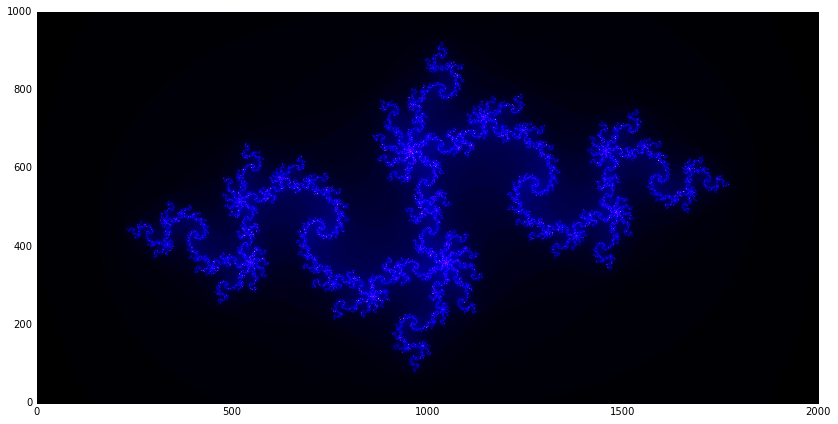

In [38]:
# plotting is much faster and much more accurate!

julia_set = julia_cython
julia_image(1000)

In [8]:
z = julia_cython_opt(1000)

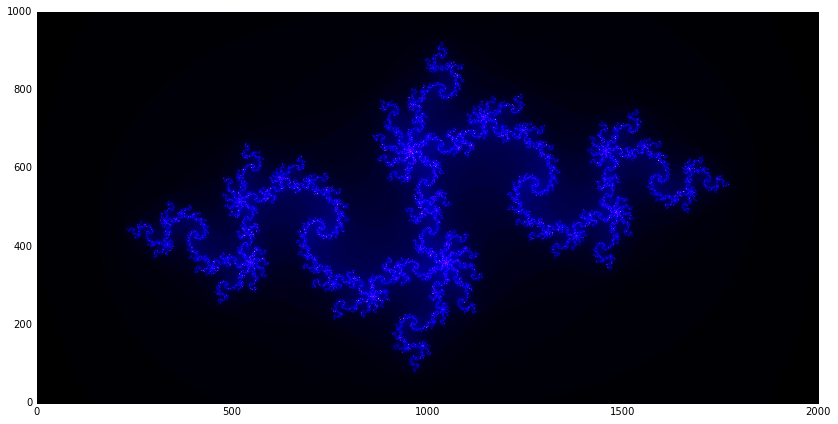

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# gnuplot -- has better rasterization -- otherwise computer crashes

N = 1000
dpi = 72
width = 1+ N//dpi
height = 1+ N//dpi

fig, ax = plt.subplots(figsize=(width, height),dpi=72)
ax.imshow(z,cmap='gnuplot2',origin='lower') 

# One more Example $c = -0.765 + 0.12i$

In [ ]:
%load_ext Cython

In [10]:
%%cython

import numpy as np
cimport numpy as np
import cython

@cython.boundscheck(False)
@cython.wraparound(False)
cpdef julia_cython_opt(int N):
    cdef np.uint8_t[:,:] T = np.empty((N, 2*N), dtype=np.uint8)
    cdef double creal = -0.765, cimag = - 0.12
    cdef double zreal, zimag, zreal2, zimag2
    cdef int J, I
    cdef double h = 2.0/N
    for J in range(N):
        for I in range(2*N):
            zimag = -1.0 + J*h
            zreal = -2.0 + I*h
            T[J,I] = 0
            zreal2 = zreal*zreal
            zimag2 = zimag*zimag
            while zimag2 + zreal2 <= 4:
                zimag = 2* zreal*zimag + cimag
                zreal = zreal2 - zimag2 + creal
                zreal2 = zreal*zreal
                zimag2 = zimag*zimag 
                T[J,I] += 1
                 
    return T

In [11]:
z = julia_cython_opt(1000)

In [12]:
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline

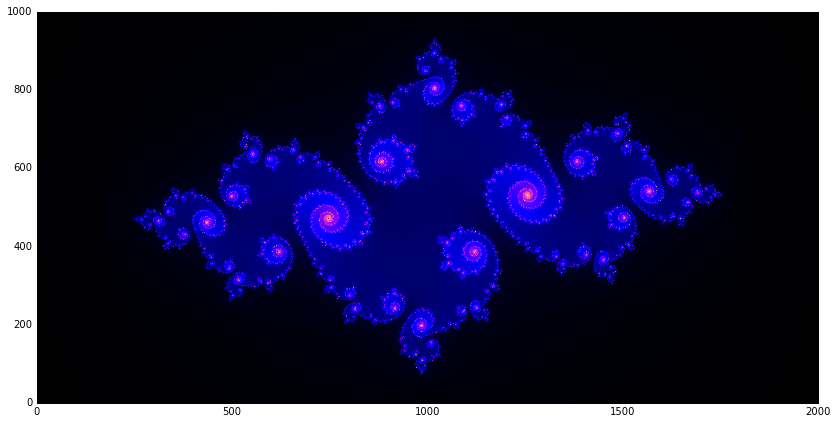

In [13]:
# gnuplot -- has better rasterization -- otherwise computer crashes

N = 1000
dpi = 72
width = 1+ N//dpi
height = 1+ N//dpi

fig, ax = plt.subplots(figsize=(width, height),dpi=72)
ax.imshow(z,cmap='gnuplot2',origin='lower') 